# TP4: Introduction aux réseaux de neurones
Pour ce TP, nous allons utiliser la librairie PyTorch.

---
Le code qui suit est une fonction qui ne sert qu'à dessiner les réseaux de neurones. **Vous n'avez pas besoin d'en prendre connaissance**. Il faut run la cellule puis passer directement à la partie **Tensors**

In [674]:
# Heavily based on https://github.com/Prodicode/ann-visualizer

def ann_viz(model, view=True, filename="network.gv"):
    """Vizualizez a Sequential model.

    # Arguments
        model: A Keras model instance.

        view: whether to display the model after generation.

        filename: where to save the vizualization. (a .gv file)

        title: A title for the graph
    """
    from graphviz import Digraph

    input_layer = 0
    hidden_layers_nr = 0
    layer_types = []
    hidden_layers = []
    output_layer = 0
    layers = [layer for layer in model.modules() if type(layer) == torch.nn.Linear]

    for layer in layers:
        if layer == layers[0]:
            input_layer = layer.in_features
            hidden_layers_nr += 1
            if type(layer) == torch.nn.Linear:                
                hidden_layers.append(layer.out_features)
                layer_types.append("Dense")
            else:
                raise Exception("Input error")

        else:
            if layer == layers[-1]:
                output_layer = layer.out_features
            else:
                hidden_layers_nr += 1
                if type(layer) == torch.nn.Linear:

                    hidden_layers.append(layer.out_features)
                    layer_types.append("Dense")
                else:
                    raise Exception("Hidden error")
        last_layer_nodes = input_layer
        nodes_up = input_layer

    g = Digraph("g", filename=filename)
    n = 0
    g.graph_attr.update(splines="false", nodesep="0.5", ranksep="0", rankdir='LR')
    # Input Layer
    with g.subgraph(name="cluster_input") as c:
        if type(layers[0]) == torch.nn.Linear:
            the_label = "Input Layer"
            if layers[0].in_features > 10:
                the_label += " (+" + str(layers[0].in_features - 10) + ")"
                input_layer = 10
            c.attr(color="white")
            for i in range(0, input_layer):
                n += 1
                c.node(str(n))
                c.attr(labeljust="1")
                c.attr(label=the_label, labelloc="bottom")
                c.attr(rank="same")                
                c.node_attr.update(
                    width="0.65",
                    style="filled",                    
                    shape="circle",
                    color=HAPPY_COLORS_PALETTE[3],
                    fontcolor=HAPPY_COLORS_PALETTE[3],
                )
    for i in range(0, hidden_layers_nr):
        with g.subgraph(name="cluster_" + str(i + 1)) as c:
            if layer_types[i] == "Dense":
                c.attr(color="white")
                c.attr(rank="same")
                the_label = f'Hidden Layer {i + 1}'
                if layers[i].out_features > 10:
                    the_label += " (+" + str(layers[i].out_features - 10) + ")"
                    hidden_layers[i] = 10
                c.attr(labeljust="right", labelloc="b", label=the_label)
                for j in range(0, hidden_layers[i]):
                    n += 1
                    c.node(
                        str(n),
                        width="0.65",
                        shape="circle",
                        style="filled",
                        color=HAPPY_COLORS_PALETTE[0],
                        fontcolor=HAPPY_COLORS_PALETTE[0],
                    )
                    for h in range(nodes_up - last_layer_nodes + 1, nodes_up + 1):
                        g.edge(str(h), str(n))
                last_layer_nodes = hidden_layers[i]
                nodes_up += hidden_layers[i]
            else:
                raise Exception("Hidden layer type not supported")

    with g.subgraph(name="cluster_output") as c:
        if type(layers[-1]) == torch.nn.Linear:
            c.attr(color="white")
            c.attr(rank="same")
            c.attr(labeljust="1")
            for i in range(1, output_layer + 1):
                n += 1
                c.node(
                    str(n),
                    width="0.65",
                    shape="circle",
                    style="filled",
                    color=HAPPY_COLORS_PALETTE[4],
                    fontcolor=HAPPY_COLORS_PALETTE[4],
                    
                )
                for h in range(nodes_up - last_layer_nodes + 1, nodes_up + 1):
                    g.edge(str(h), str(n))
            c.attr(label="Output Layer", labelloc="bottom")
            c.node_attr.update(
                color="#2ecc71", style="filled", fontcolor="#2ecc71", shape="circle"
            )

    g.attr(arrowShape="none")
    g.edge_attr.update(arrowhead="none", color="#707070", penwidth="2")
    if view is True:
        g.view()

    return g

---
## 1. Tensors

1. Importez torch et numpy :

In [675]:
# Import libraries
import torch as torch
import numpy as np

2. Transformez *data* en tensor :

In [676]:
# Create some data
data = [[1, 2],[3, 4]]

# From list to tensor
data = torch.tensor(data)
data

tensor([[1, 2],
        [3, 4]])

3. Transformez *data* en array puis de array en tensor

In [677]:
# From list to array
data = np.array(data)
print(data)
# From array to tensor
data = torch.tensor(data)
print(data)

[[1 2]
 [3 4]]
tensor([[1, 2],
        [3, 4]])


4. Créez un tensor avec des valeurs aléatoires (**torch.rand()**) ayant une forme (3,4). Puis affichez ses valeurs, son type (**.dtype**) et le device (**.device**) sur lequel est enregistré ce dernier.

In [678]:
# Create random tensor of shape (3, 4)
data_rand = torch.rand([3, 4])
print(data_rand)
print(data_rand.dtype)
print(data_rand.device)

tensor([[0.5895, 0.7539, 0.1952, 0.0050],
        [0.3068, 0.1165, 0.9103, 0.6440],
        [0.7071, 0.6581, 0.4913, 0.8913]])
torch.float32
cpu


5. Créez 2 tensors:
[[10, 20], [30, 40]]
et [[2, 2], [1, 5]].  
Faites en la somme puis la multiplication.

In [679]:
# Create 2 tensor
tensor1 = [[10,20],[30, 40]]
tensor2 = [[2, 2],[1, 5]]
tensor1 = torch.tensor(tensor1)
tensor2 = torch.tensor(tensor2)

# Elementwise sum and mult
sum = tensor1 + tensor2
mult = tensor1 * tensor2
print(sum)
print(mult)

tensor([[12, 22],
        [31, 45]])
tensor([[ 20,  40],
        [ 30, 200]])


6. Transformez le résultat de la multiplication en array

In [680]:
# From tensor to array
mult.numpy()


array([[ 20,  40],
       [ 30, 200]])

---
## 2. Build your own MLP


In [681]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt

from torch import nn, optim
import torch.nn.functional as F


%matplotlib inline
%config InlineBackend.figure_format='retina'

# Display graph parameters
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8

# Random seed parameters
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

### Préparation des données
Pour tout projet de data science, la première partie, et souvent la plus fastidieuse, est la préparation des données. Une fois cette étape validée, vous pourrez utiliser ces dernières dans un réseau de neurones.

Téléchargez les données au lien suivant: [https://www.kaggle.com/jsphyg/weather-dataset-rattle-package](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package)  
Créez un dossier Data/ et importer les données dans ce dernier.  
Dézippez le fichier dans le dossier Data:

In [682]:
# Unzip file containing data
# !unzip  Data/archive.zip -d Data/

7. Créez le dataframe *df* à partir des données *weatherAUS.csv*

In [683]:
# Read data
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


8. Affichez le nombre de lignes puis de colonnes du dataframe

In [684]:
# Number of rows
print(len(df))
# Number of columns
print(len(df.columns))

145460
23


9. Sélectionnez uniquement les colonnes de *df* qui nous intéresse:  
['Rainfall', 'Humidity3pm', 'Pressure9am', 'RainToday', 'RainTomorrow']

In [685]:
# Select only relevant columns
my_columns = ['Rainfall', 'Humidity3pm', 'Pressure9am', 'RainToday', 'RainTomorrow']
df = df[my_columns]
df.head()

,Rainfall,Humidity3pm,Pressure9am,RainToday,RainTomorrow
0,0.6,22.0,1007.7,No,No
1,0.0,25.0,1010.6,No,No
2,0.0,30.0,1007.6,No,No
3,0.0,16.0,1017.6,No,No
4,1.0,33.0,1010.8,No,No


10. Checkez les valeurs manquantes puis supprimez les lignes contenant des NaN.

In [686]:
# Print NaN
print(df[df.isna().any(axis=1)])
# Drop NaN
df.dropna(inplace=True)
print('*************')
print(df)

        Rainfall  Humidity3pm  Pressure9am RainToday RainTomorrow
14           0.0         32.0       1009.7        No          NaN
15           NaN         28.0       1013.4       NaN           No
283          0.0         55.0       1017.8        No          NaN
284          NaN         46.0       1022.2       NaN           No
435          0.0         37.0       1020.9        No          NaN
...          ...          ...          ...       ...          ...
145092       NaN         67.0       1015.2       NaN          NaN
145093       NaN         39.0       1022.4       NaN           No
145335       0.0         11.0       1013.7        No          NaN
145336       NaN         16.0       1011.4       NaN           No
145459       0.0         36.0       1020.2        No          NaN

[20771 rows x 5 columns]
*************
        Rainfall  Humidity3pm  Pressure9am RainToday RainTomorrow
0            0.6         22.0       1007.7        No           No
1            0.0         25.0       

Dans cette exemple, nous avons assez d'observations à étudier, on va se contenter de supprimer toutes les lignes où des NaN sont présents.
**Note:** cette manière de pratiquer n'est pas très académique mais le but du TP est autre.

11. Les modèles de machine learning n'acceptent que des données numériques. Il faut donc transformer les valeurs qualitatives en quantitatives des colonnes RainToday et RainTomorrow:  
- Yes = 1
- No = 0

S'assurer que les colonnes soient bien de type **int**.

In [687]:
# Transform string into binary int values
# df.loc[df.B == 'b', 'C'] = 'no'
# df.loc[df.B == 'b', 'C'] = 'no'
dico = {
    'Yes': 1,
    'No' : 0,
}

# Map it to Genre
df['RainTomorrow'] = df['RainTomorrow'].map(dico)
df['RainToday'] = df['RainToday'].map(dico)
df.head(100)

,Rainfall,Humidity3pm,Pressure9am,RainToday,RainTomorrow
0,0.6,22.0,1007.7,0,0
1,0.0,25.0,1010.6,0,0
2,0.0,30.0,1007.6,0,0
3,0.0,16.0,1017.6,0,0
4,1.0,33.0,1010.8,0,0
...,...,...,...,...,...
97,0.0,20.0,1017.0,0,0
98,0.0,28.0,1019.7,0,0
99,0.0,25.0,1019.5,0,1
100,1.2,23.0,1021.3,1,0


Ensuite, on va découper notre jeu de données en 2 datasets:  
- 1 pour l'entraînement du réseau. Que l'on découpera ensuite en 2 autres datasets (train/test)
- 1 pour tester notre modèle (test). Ce dernier va nous permettre de calculer les performances de notre modèle sur des données nouvelles, pas utilisée lors de l'entraînement.

12. Utilisez **train_test_split** pour créer deux datasets à partir de *df*: *df_train* et *df_test*

In [688]:
# Split df into train/test set (80%/20%) with random_state=RANDOM_SEED
df_train, df_test= train_test_split(df,  test_size=0.20, random_state=RANDOM_SEED)
print(len(df_train))
print(len(df_test))

99751
24938


Un des problèmes classique en machine learning est le déséquilibre de classe. Ce problème est souvent à l'origine de piètres performances des modèles. On va regarder ce qu'il en est pour notre jeu de données:

13. Tracez un barplot qui représente la distribution des valeurs de la colonne *df_train.RainTomorrow*. Vous pouvez facilement y parvenir grâce à *sns.countplot()*

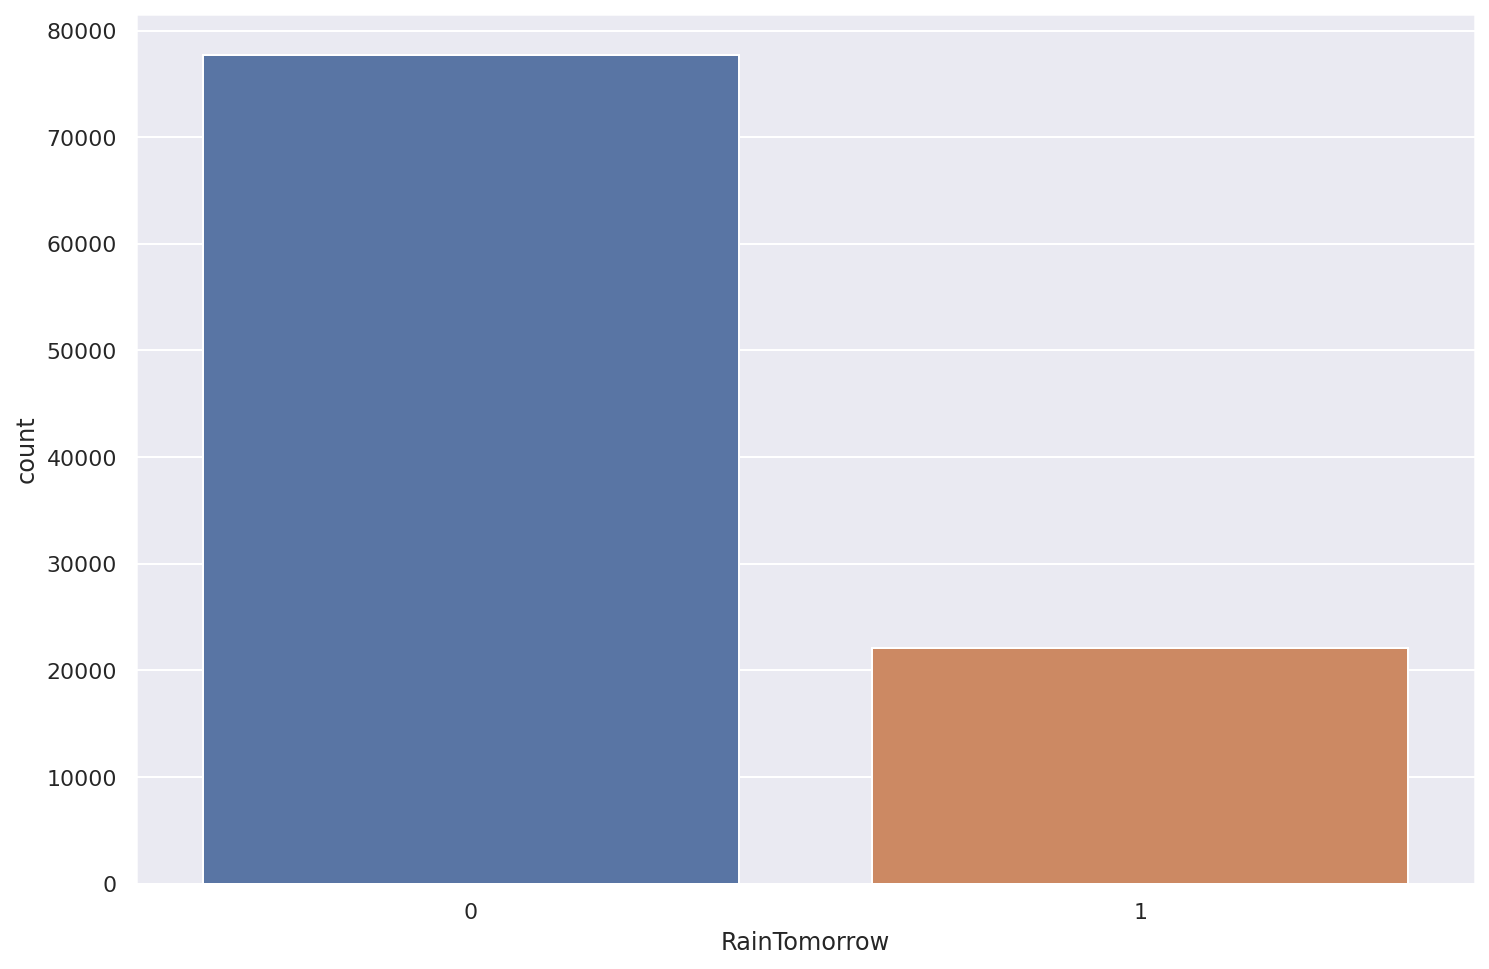

In [689]:
# Countplot
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="RainTomorrow", data=df_train)

14. Déterminer le pourcentage de 0 et de 1 dans cette même colonnne *df_train.RainTomorrow*

In [690]:
# In percent, we get:
df_train['RainTomorrow'].value_counts(normalize=True) * 100

0    77.883931
1    22.116069
Name: RainTomorrow, dtype: float64

Notre dataset est énormément déséquilibré! (78%/22%).  
 On va appliquer la technique dites d'oversampling (simple). C'est à dire augmenter la quantité de lignes ayant pour valeur cible 1 pour en avoir que de 1. Ici, on ajoute simplement à df_train des lignes où RainTomorrow == 1.

In [691]:
# Oversampling
df_train = pd.concat([df_train, df_train[df_train.RainTomorrow == 1], df_train[df_train.RainTomorrow == 1]], axis=0)

15. Tracez l'histogramme qui montre la nouvelle distribution de RainTomorrow et calculez le pourcentage de 0 et de 1.

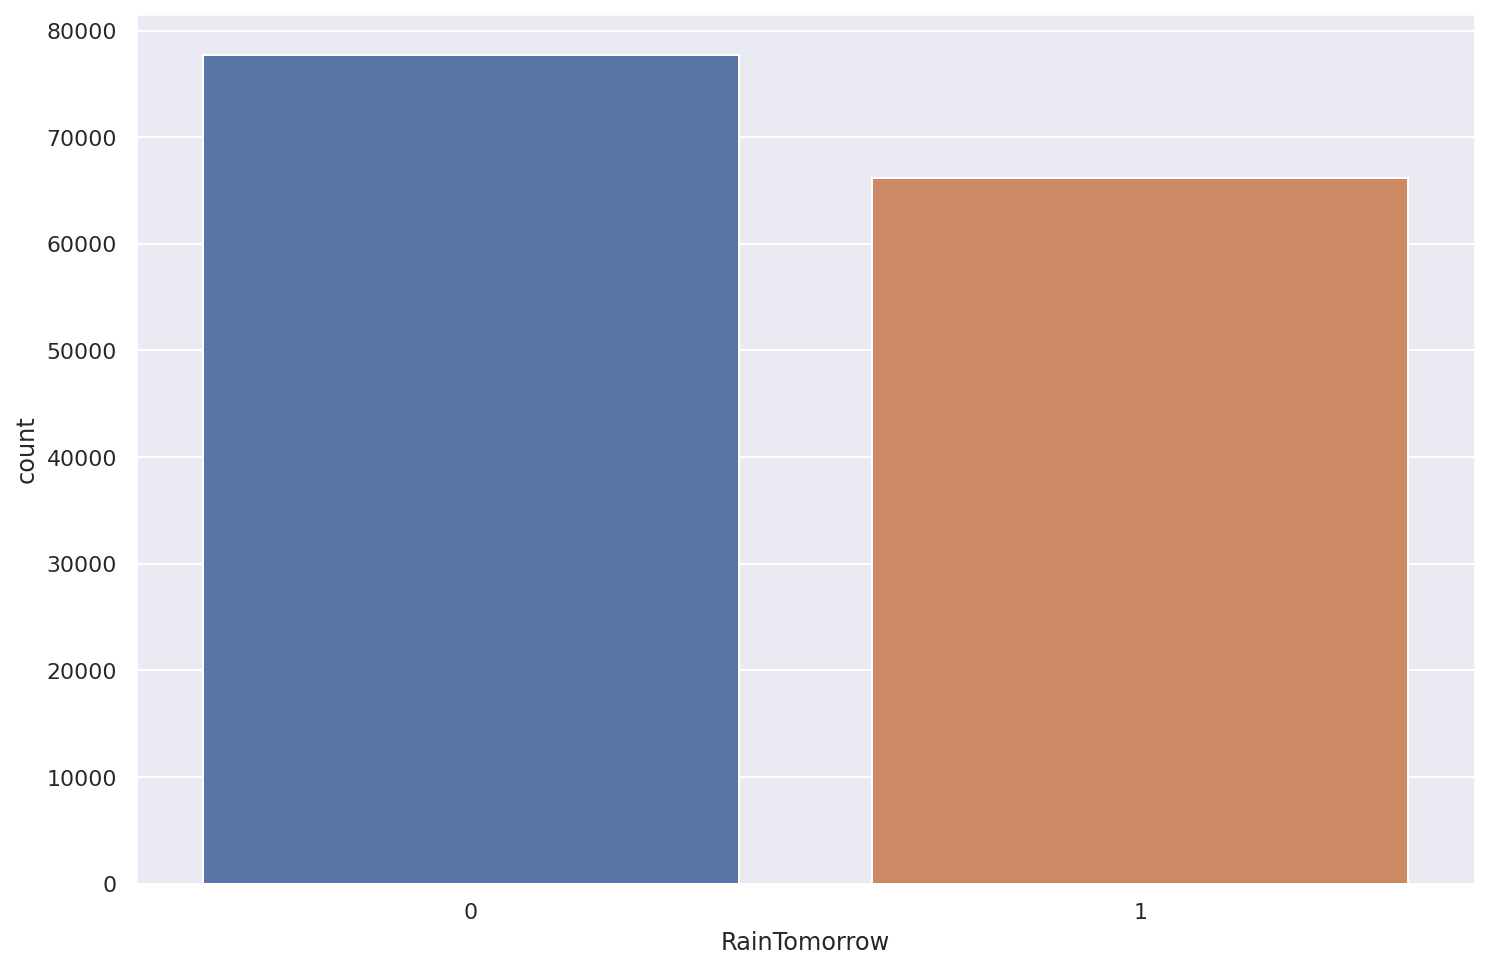

In [692]:
# Print again the new balance between rain and no rain
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="RainTomorrow", data=df_train)


In [693]:
# In percent, we get:
df_train['RainTomorrow'].value_counts(normalize=True) * 100

0    53.999013
1    46.000987
Name: RainTomorrow, dtype: float64

Maintenant que nos données sont à peu près équilibrées (53%/46%), il faut découper notre jeu de données en jeu de train et validation.

16. Découpez en deux dataset le dataframe df_train (80% de données en train et 20% en validation). Vous pouvez à nouveau utiliser la fonction **train_test_split**, mais cette fois avec df_train et les colonnes pertinentes. df_train[X] pour les variables et df_train[y] pour la valeur cible.

In [694]:
# Split df_train in train/validation set (80%/20%) with random_state=RANDOM_SEED
x_train, x_validation, y_train, y_validation = train_test_split(df_train.drop(columns='RainTomorrow'), df_train['RainTomorrow'], test_size=0.20, random_state=RANDOM_SEED)
print(x_train)
print(y_train)

        Rainfall  Humidity3pm  Pressure9am  RainToday
62657        0.4         66.0       1013.2          0
10798        0.0         74.0       1001.2          0
93964       16.4         24.0       1014.3          1
68747        0.0         51.0       1005.9          0
136325       0.0          4.0       1016.1          0
...          ...          ...          ...        ...
3262         0.0         71.0       1017.0          0
39154        2.6         92.0       1005.4          1
129666       0.0         59.0       1004.9          0
34908        0.0         66.0       1014.3          0
43974        0.0         83.0       1015.2          0

[115098 rows x 4 columns]
62657     1
10798     0
93964     0
68747     1
136325    0
         ..
3262      1
39154     1
129666    1
34908     1
43974     1
Name: RainTomorrow, Length: 115098, dtype: int64


17. Convertissez X_train, X_test, y_train, y_test en array (*.to_numpy*) puis de array en tensor (*torch.from_numpy*) sous la forme de float (*.float*). Attention les *y_* doivent être *.squeeze*.

In [695]:
# Convert data from numpy to float tensor
x_train = torch.from_numpy(x_train.to_numpy()).float()
x_validation = torch.from_numpy(x_validation.to_numpy()).float()
y_train = (torch.from_numpy(y_train.to_numpy()).float()).squeeze()
y_validation = (torch.from_numpy(y_validation.to_numpy()).float()).squeeze()
print(x_train.dtype)
print(y_train.dtype)
print(x_validation.dtype)
print(y_validation.dtype)

torch.float32
torch.float32
torch.float32
torch.float32


### Multi Layer Perceptron

#### Create the network

Dans cette partie, vous allez utiliser un MLP pour réaliser les prédictions de pluie à l'aide de la variable RainTomorrow. Vous pouvez observer dans la classe MLP les différentes couches de neurones, leurs dimensions et les fonctions d'activations utilisées.

In [696]:
# Définir la classe MLP
class MLP(nn.Module):

  def __init__(self, n_features):
    super(MLP, self).__init__()
    self.fc1 = nn.Linear(n_features, 5)
    self.fc2 = nn.Linear(5, 3)
    self.fc3 = nn.Linear(3, 1)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    return torch.sigmoid(self.fc3(x))

In [697]:
# Initialize the network
model = MLP(x_train.shape[1])

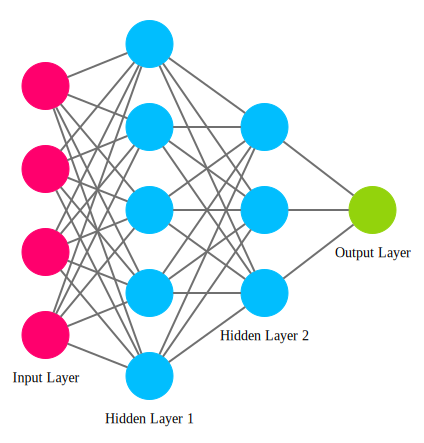

In [698]:
# Print our network
ann_viz(model, view=False)

On peut aussi afficher la structure du modèle:

In [699]:
# Check model structure
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  MLP(
  (fc1): Linear(in_features=4, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=1, bias=True)
) 


Layer: fc1.weight | Size: torch.Size([5, 4]) | Values : tensor([[ 0.3823,  0.4150, -0.1171,  0.4593],
        [-0.1096,  0.1009, -0.2434,  0.2936]], grad_fn=<SliceBackward0>) 

Layer: fc1.bias | Size: torch.Size([5]) | Values : tensor([-0.2304, -0.0586], grad_fn=<SliceBackward0>) 

Layer: fc2.weight | Size: torch.Size([3, 5]) | Values : tensor([[-0.2062, -0.1263, -0.2689,  0.0422, -0.4417],
        [ 0.4039, -0.3799,  0.3453,  0.0744, -0.1452]],
       grad_fn=<SliceBackward0>) 

Layer: fc2.bias | Size: torch.Size([3]) | Values : tensor([ 0.1202, -0.1213], grad_fn=<SliceBackward0>) 

Layer: fc3.weight | Size: torch.Size([1, 3]) | Values : tensor([[ 0.5155,  0.3337, -0.2524]], grad_fn=<SliceBackward0>) 

Layer: fc3.bias | Size: torch.Size([1]) | Values : tensor([0.3333], grad_fn=<SliceBac

18. Maintenant que le réseau est créé, vous allez définir ses hyperparamètres.   
On veut utiliser la fonction de perte **nn.BCELoss** et l'optimiseur **optim.SGD** avec un learning rate de 0.001

In [700]:
## Hyperparameters

# Choose the loss function
criterion = nn.BCELoss()
# Choose the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)

Ensuite on définit quelques fonctions et listes...

In [701]:
# Define a wee function to compute accuracy
def calculate_accuracy(y_true, y_pred):
  predicted = y_pred.ge(.5).view(-1)
  return (y_true == predicted).sum().float() / len(y_true)

# Define a function to round numbers
def round_tensor(t, decimal_places=3):
  return round(t.item(), decimal_places)

In [702]:
# Create some empty lists to pick up some values during training
list_train_loss = []
list_val_loss = []
list_train_acc = []
list_val_acc = []

#### Training

19. C'est ici que l'entraînement du modèle va avoir lieu. Les données seront lues 1000 fois (1000 epochs). Vous allez devoir compléter les lignes de codes et permettre l'entraînement du modèle.

In [703]:
############## TRAINING ##############
for epoch in range(1000):
    
    # Do prediction on trainset
    y_pred = model(x_train)
    y_pred = torch.squeeze(y_pred)

    # Compute loss
    train_loss = criterion(y_pred, y_train)
    
    # For some epoch compute val loss and accuracy
    if epoch % 100 == 0:
      # Accuracy between train and true
      train_acc = calculate_accuracy(y_train, y_pred)
      
      # Prediction on X_validation
      y_val_pred = model(x_validation)
      y_val_pred = torch.squeeze(y_val_pred)

      # Compute loss and accuracy on validation
      val_loss = criterion(y_val_pred, y_validation)
      val_acc = calculate_accuracy(y_validation, y_val_pred)

      # Save train/val loss/accuracy
      list_train_loss.append(round_tensor(train_loss))
      list_val_loss.append(round_tensor(val_loss))
      list_train_acc.append(round_tensor(train_acc))
      list_val_acc.append(round_tensor(val_acc))

      # Print some informations
      print(
f'''epoch {epoch}
Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
Validation  set - loss: {round_tensor(val_loss)}, accuracy: {round_tensor(val_acc)}
''')
    
    # All gradients to zero (avoid exploding gradient)
    optimizer.zero_grad()

    # Backproapagation
    train_loss.backward()
    
    # Update weights
    optimizer.step()

epoch 0
Train set - loss: 7.333, accuracy: 0.461
Validation  set - loss: 7.392, accuracy: 0.457

epoch 100
Train set - loss: 16.048, accuracy: 0.539
Validation  set - loss: 15.897, accuracy: 0.543

epoch 200
Train set - loss: 0.66, accuracy: 0.652
Validation  set - loss: 0.66, accuracy: 0.658

epoch 300
Train set - loss: 0.687, accuracy: 0.491
Validation  set - loss: 0.689, accuracy: 0.486

epoch 400
Train set - loss: 0.631, accuracy: 0.625
Validation  set - loss: 0.632, accuracy: 0.624

epoch 500
Train set - loss: 0.623, accuracy: 0.63
Validation  set - loss: 0.624, accuracy: 0.63

epoch 600
Train set - loss: 0.612, accuracy: 0.643
Validation  set - loss: 0.613, accuracy: 0.642

epoch 700
Train set - loss: 0.603, accuracy: 0.654
Validation  set - loss: 0.604, accuracy: 0.654

epoch 800
Train set - loss: 0.596, accuracy: 0.662
Validation  set - loss: 0.596, accuracy: 0.661

epoch 900
Train set - loss: 0.589, accuracy: 0.669
Validation  set - loss: 0.589, accuracy: 0.67



20. Afin d'éviter l'overfitting ou l'underfitting de notre modèle, vous allez analyser les valeurs de perte que relevées pour le trainset et validation set. Utilisez les variables *list_train_loss* et *list__loss* et tracez leur variation en fonction de leur epoch associée. **plt.plot()**

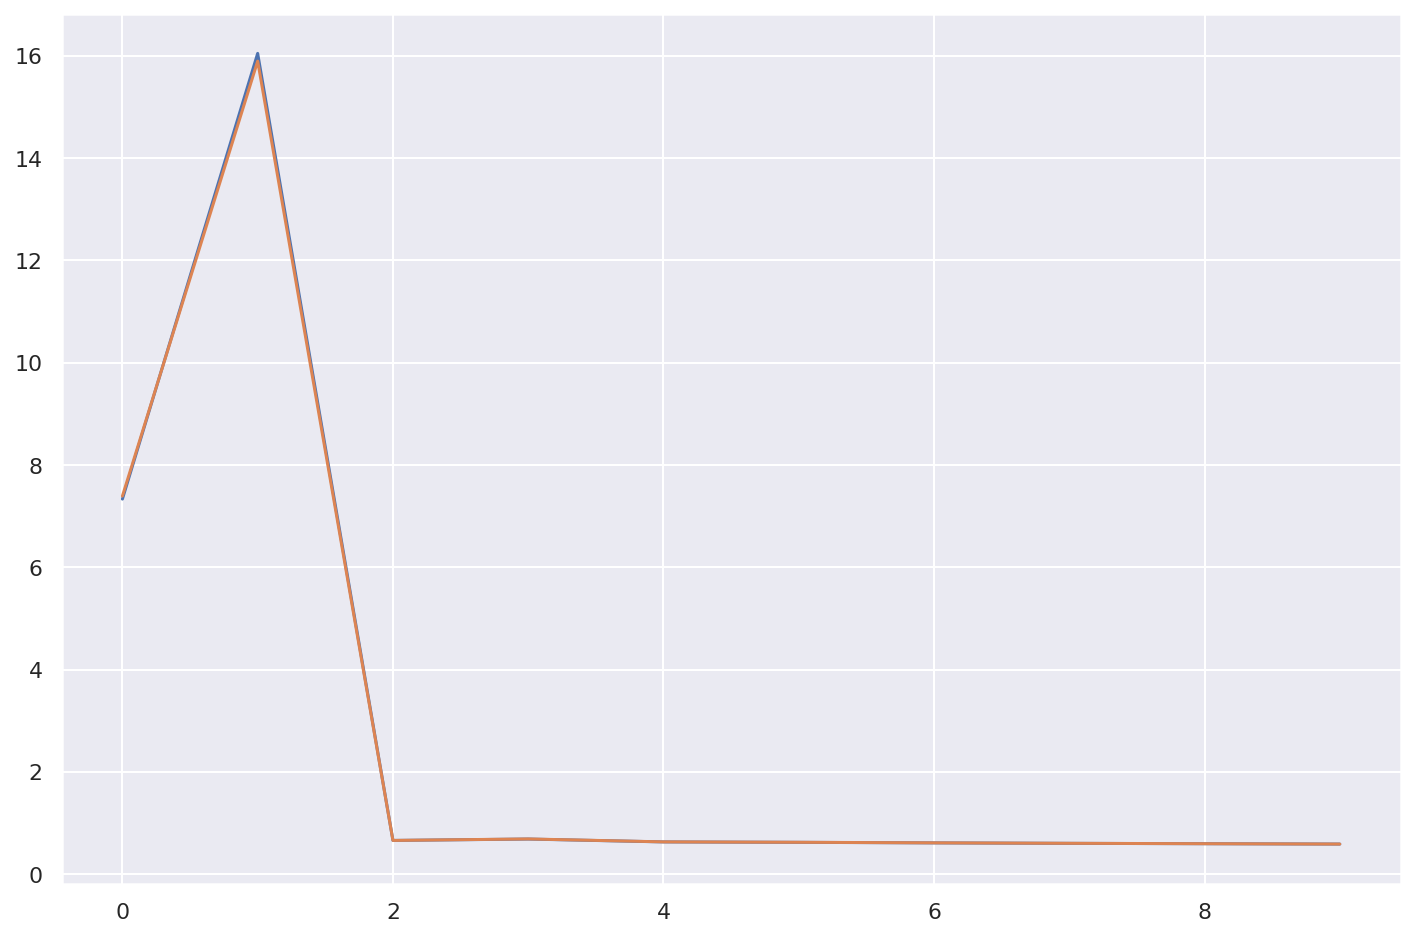

In [704]:
# Check overfitting (Train Loss vs Test Loss)
plt.plot(list_train_loss)
plt.plot(list_val_loss)

#### Test
Le test est une étape d'inférence. Le modèle maintenant entraîné va être capable de faire des prédictions sur des données qu'il n'a jamais vu. Nous pourrons alors déterminer son efficacité.

21. Vous devez donc créer 2 variables issues de *df_test*: *X_test* et *y_test*. Comme précédemment, convertir d'abord *df_test[X]* en array puis en tensor et en float. Pareil pour *df_test[y]*.  
Puis faire les prédiction à l'aide du modèle sur les données *X_test*.

In [705]:
# Convert data from numpy to tensor
# x_test, y_test =  train_test_split(df_test, random_state=RANDOM_SEED)

x_test = df_test.drop(columns='RainTomorrow')
y_test = df_test.drop(columns=['Rainfall',  'Humidity3pm' , 'Pressure9am',  'RainToday'])

x_test = torch.from_numpy(x_test.to_numpy()).float()
y_test = (torch.from_numpy(y_test.to_numpy()).float()).squeeze()
print(x_test.dtype)
print(y_test.dtype)

torch.float32
torch.float32


22. Utiliser la fonction **classification_report** pour obtenir toutes les métriques qui vous aideront à qualifier les performances de votre modèle.

In [706]:
# Do prediction on testset
y_pred = model(x_test)
for i in range(len(y_pred)):
  if y_pred[i] >= 0.5:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

classes = ['No rain', 'Raining']
print(classification_report(y_test.detach().numpy(), y_pred.detach().numpy(), target_names=classes))

              precision    recall  f1-score   support

     No rain       0.93      0.53      0.67     19413
     Raining       0.34      0.85      0.49      5525

    accuracy                           0.60     24938
   macro avg       0.63      0.69      0.58     24938
weighted avg       0.80      0.60      0.63     24938



#### Confusion Matrix

23. Ici, je vous ai créé la matrice de confusion associée aux résultats du test. Conclure sur l'efficacité de votre modèle:

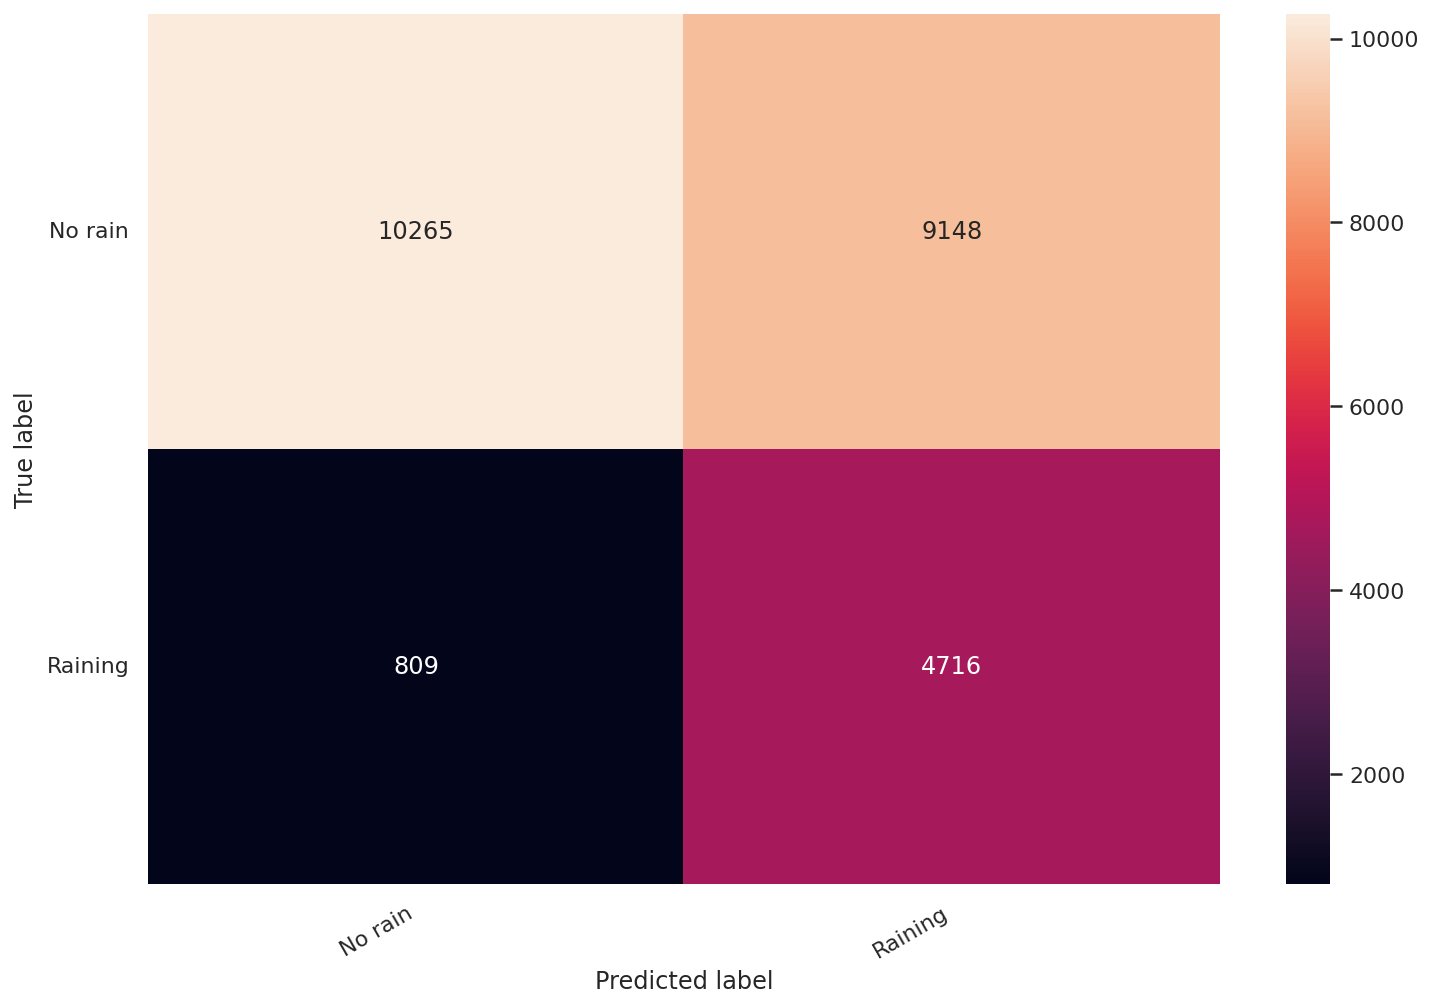

In [707]:
cm = confusion_matrix(y_test.detach().numpy(), y_pred.detach().numpy())
df_cm = pd.DataFrame(cm, index=classes, columns=classes)

hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [708]:
print(f'Number of "No rain" values: {np.count_nonzero(y_test.numpy() == 0)}')
print(f'Number of "Raining" values: {np.count_nonzero(y_test.numpy() == 1)}')

Number of "No rain" values: 19413
Number of "Raining" values: 5525


**Note:** avant de passer à la suite du TP, vous pouvez essayer de modifier l'architecture du MLP (nombre de layers, fonction d'activations, ...) que vous avez utilisé pour faire la prédiction et relancer le code en entier. Vous pourrez alors observer des variations de performances.

## 3. A vous de jouer !

Télécharger l'archive au [lien](https://www.kaggle.com/iabhishekofficial/mobile-price-classification/download) suivant et placez là dans un dossier Data2 que vous créerez.  
Après avoir dézippé l'archive, vous trouverez un jeu de données de train et un de test. Vous trouverez une description des données [ici](https://www.kaggle.com/iabhishekofficial/mobile-price-classification?select=train.csv).

24. Sur le même principe que pour la partie **Build your own MLP**, vous devez créer un réseau de neurones multi-couche afin de prédire la classe de prix des téléphones du jeu de test. Vous êtes libre dans la préparation des données, le choix des variables et des paramètres (optimizer, learning rate, fonction d'activation, ...).  
Utilisez la fonction [**classification_report()**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) pour afficher les résultats de votre prédiction.